In [12]:
import PIL.Image as Img
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
import cv2 as cv
import torch.nn as nn
import numpy as np
from scipy import signal

((1375, 2200, 3), torch.Size([1375, 2200, 3]))

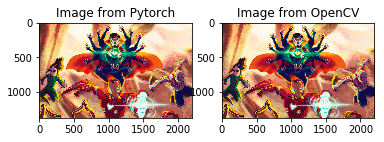

In [3]:
t = transforms.ToTensor()
img = Img.open('avengers.jpg')
img = t(img)

torchimage = img.permute(1,2,0)
cvimage = cv.imread('avengers.jpg')
cvimage = cv.cvtColor(cvimage, cv.COLOR_BGR2RGB)

plt.subplot(1,2,1)
plt.imshow(torchimage, cmap='gray')
plt.title('Image from Pytorch')

plt.subplot(1,2,2)
plt.imshow(cvimage)
plt.title('Image from OpenCV')

cvimage.shape, torchimage.shape

### Identity Filter

In [63]:
identity_data = [[1.,0.,1.],
                [0.,-4.,0.],
                [1.,0.,1.]]

identity_kernel = torch.tensor([
    [
        identity_data,
        identity_data,
        identity_data
    ],
    [
        identity_data,
        identity_data,
        identity_data
    ],
    [
        identity_data,
        identity_data,
        identity_data
    ]
])
identity_kernel = identity_kernel / 9
identity = nn.Conv2d(3,3,3)
identity.weight.data.shape, identity_kernel.shape

(torch.Size([3, 3, 3, 3]), torch.Size([3, 3, 3, 3]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


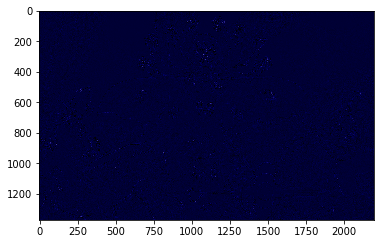

In [64]:
identity.weight.data = identity_kernel
filtered = identity(torch.unsqueeze(img, 0))
filtered = filtered.detach().squeeze()/filtered.detach().max()
plt.imshow(filtered.permute(1,2,0))

In [6]:
filtered.detach().squeeze()/filtered.detach().max()

tensor([[[0.4365, 0.4289, 0.4220,  ..., 0.9565, 0.9571, 0.9534],
         [0.4157, 0.4069, 0.4065,  ..., 0.9569, 0.9565, 0.9547],
         [0.3981, 0.3937, 0.4031,  ..., 0.9574, 0.9574, 0.9563],
         ...,
         [0.2738, 0.2741, 0.2722,  ..., 0.5897, 0.5790, 0.5778],
         [0.2703, 0.2758, 0.2733,  ..., 0.5952, 0.5860, 0.5723],
         [0.2670, 0.2737, 0.2744,  ..., 0.5955, 0.6044, 0.5950]],

        [[0.4155, 0.4080, 0.4011,  ..., 0.9355, 0.9362, 0.9325],
         [0.3948, 0.3860, 0.3856,  ..., 0.9359, 0.9355, 0.9337],
         [0.3772, 0.3728, 0.3821,  ..., 0.9365, 0.9365, 0.9354],
         ...,
         [0.2529, 0.2532, 0.2512,  ..., 0.5688, 0.5581, 0.5568],
         [0.2493, 0.2548, 0.2523,  ..., 0.5743, 0.5651, 0.5513],
         [0.2460, 0.2528, 0.2534,  ..., 0.5746, 0.5835, 0.5740]],

        [[0.4278, 0.4202, 0.4134,  ..., 0.9478, 0.9485, 0.9448],
         [0.4071, 0.3983, 0.3979,  ..., 0.9482, 0.9478, 0.9460],
         [0.3895, 0.3851, 0.3944,  ..., 0.9488, 0.9488, 0.

In [99]:
identity = [[1,2,1],
            [2,4,2],
            [1,2,1]]
identity = np.array(identity, dtype=np.uint8)/16
r,g,b = cv.split(cvimage)

array([[[0.03970588, 0.01617647, 0.01666667],
        [0.12328431, 0.05171569, 0.04632353],
        [0.17647059, 0.07426471, 0.05539216],
        ...,
        [0.24754902, 0.24068627, 0.2245098 ],
        [0.18455882, 0.17941176, 0.16666667],
        [0.06127451, 0.05955882, 0.05514706]],

       [[0.12377451, 0.05171569, 0.04901961],
        [0.3752451 , 0.1625    , 0.13823529],
        [0.52058824, 0.2254902 , 0.16862745],
        ...,
        [0.74215686, 0.72132353, 0.67254902],
        [0.55343137, 0.5379902 , 0.49926471],
        [0.18382353, 0.17867647, 0.16544118]],

       [[0.17181373, 0.0752451 , 0.06151961],
        [0.50759804, 0.23161765, 0.17990196],
        [0.67156863, 0.30759804, 0.22990196],
        ...,
        [0.98872549, 0.96176471, 0.89681373],
        [0.7379902 , 0.71862745, 0.66666667],
        [0.24534314, 0.23897059, 0.22107843]],

       ...,

       [[0.09583333, 0.01789216, 0.04803922],
        [0.29411765, 0.05367647, 0.14289216],
        [0.41053922, 0

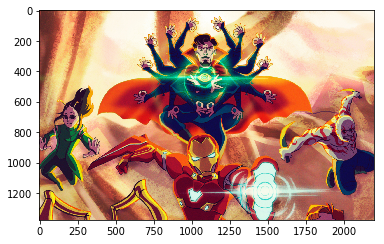

In [97]:
cr = signal.convolve2d(r, identity)
cg = signal.convolve2d(g, identity)
cb = signal.convolve2d(b, identity)
newimage = cv.merge((cr,cg, cb))
newimage = newimage/255
plt.imshow(newimage)
newimage

In [147]:
m = nn.MaxPool2d(3, stride=2)
input = torch.randn(20, 16, 50)

In [148]:
output = m(input)

In [149]:
input[0][1]

tensor([ 1.4414,  0.1094, -2.3846, -0.4883, -0.1688, -0.2563,  0.2056, -0.3223,
        -0.8920,  1.5060,  1.0610, -0.4444,  0.1359,  0.0678,  1.2528,  1.2318,
        -1.4044,  1.3854,  1.0614,  1.6944,  0.2188,  1.2159,  0.2005, -0.4572,
        -1.4999, -1.7772, -1.0440,  0.7876, -0.6967, -0.6083, -0.5040,  0.7326,
         1.4890,  0.0559, -0.7250,  0.3944, -0.8624,  1.4791,  0.2788,  1.2825,
        -2.2426,  1.3160, -1.4532, -0.6616,  0.0871,  0.9792, -0.4032,  0.2036,
         0.8606,  0.9033])

In [150]:
output[0][1]

tensor([2.6827, 1.4910, 1.5124, 1.5124, 1.0526, 2.0651, 2.0651, 1.8429, 1.5095,
        1.5095, 1.2827, 1.9704, 1.9704, 2.7543, 3.0950, 1.0754, 1.3384, 1.5069,
        1.4958, 0.7914, 1.2887, 3.3396, 0.2689, 1.9148])